<a href="https://colab.research.google.com/github/Hania111/sentiment-to-hate-analysis/blob/master/BERTwithStatistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data preparation

In [1]:
from google.colab import files
uploaded = files.upload()

Saving hateful_sentiment.csv to hateful_sentiment.csv


In [2]:
uploaded = files.upload()

Saving Sentiment140_filtered.csv to Sentiment140_filtered.csv


Install packages

In [3]:
!pip install transformers
!pip install datasets
!pip install scikit-posthocs

Import libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
import torch
from sklearn.model_selection import StratifiedKFold, ParameterGrid
import scikit_posthocs as sp

Prepare datasets

In [5]:
sentiment_dataset = pd.read_csv("Sentiment140_filtered.csv")

In [6]:
sentiment_dataset.head()

,Unnamed: 0,target,ids,date,flag,user,text,hate_pred
0,750,0,1467998601,Mon Apr 06 23:11:18 PDT 2009,NO_QUERY,Young_J,I'm off too bed. I gotta wake up hella early t...,1
1,766711,0,2300049112,Tue Jun 23 13:40:12 PDT 2009,NO_QUERY,dougnawoschik,I havent been able to listen to it yet My spe...,1
2,285055,0,1993474319,Mon Jun 01 10:26:09 PDT 2009,NO_QUERY,thireven,now remembers why solving a relatively big equ...,1
3,705995,0,2256551006,Sat Jun 20 12:56:51 PDT 2009,NO_QUERY,taracollins086,"Ate too much, feel sick",1
4,379611,0,2052381070,Sat Jun 06 00:32:23 PDT 2009,NO_QUERY,Portablemonkey,Tried to purchase a parked domain through GoDa...,1


In [7]:
sentiment_dataset.isnull().sum()

,0
Unnamed: 0,0
target,0
ids,0
date,0
flag,0
user,0
text,0
hate_pred,0


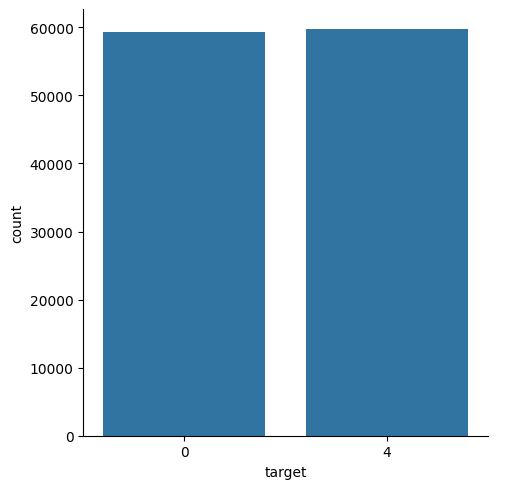

In [8]:
sns.catplot(x = 'target', data = sentiment_dataset, kind = 'count')

In [9]:
hateful_dataset = pd.read_csv("hateful_sentiment.csv")

In [10]:
hateful_dataset.head()

,Content,Label,Content_int
0,retweet to the rejects who constantly call my ...,1,"[146715, 1761, 7, 3, 22587, 67, 6768, 472, 129..."
1,i purpose that whatever attack everyone who ca...,1,"[146715, 80, 4226, 28, 220, 1347, 1568, 67, 65..."
2,are you fucking kidding me you deserve to fuck...,1,"[146715, 154, 26, 69, 1361, 78, 26, 6610, 7, 6..."
3,retweet i am not racist and i am not sexist i ...,1,"[146715, 1761, 80, 81, 76, 1723, 111, 80, 81, ..."
4,just imagine if the two million spent on the s...,1,"[146715, 14, 925, 204, 3, 672, 462, 5271, 9, 3..."


In [11]:
hateful_dataset = hateful_dataset[["Content", "Label"]]
hateful_dataset = hateful_dataset.rename(columns = {"Content": "text", "Label": "target"})
hateful_dataset["target"] = 2

hateful_dataset.head()

,text,target
0,retweet to the rejects who constantly call my ...,2
1,i purpose that whatever attack everyone who ca...,2
2,are you fucking kidding me you deserve to fuck...,2
3,retweet i am not racist and i am not sexist i ...,2
4,just imagine if the two million spent on the s...,2


In [12]:
sentiment_dataset.loc[sentiment_dataset['target']==4, 'target'] = 1
sentiment_dataset.loc[sentiment_dataset['target']==0, 'target'] = 0
# 0 - negative, 1 - positive, 2 - hateful

In [13]:
sentiment_dataset = pd.concat([sentiment_dataset, hateful_dataset], ignore_index= True)

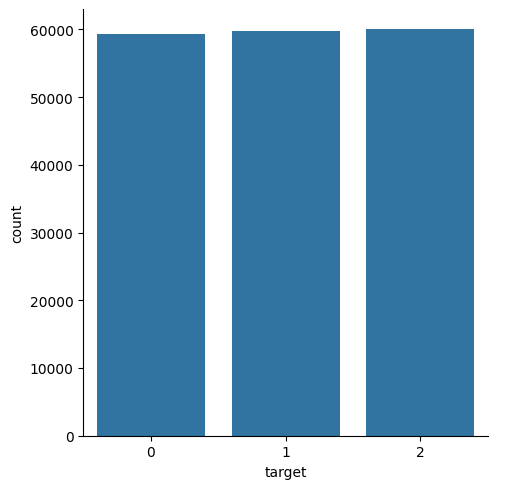

In [14]:
sns.catplot(x = 'target', data = sentiment_dataset, kind = 'count')

In [15]:
sentiment_dataset['target'].value_counts()

,count
target,
2,60000
1,59700
0,59300



Fold 1


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'loss': 0.5169, 'grad_norm': 7.730590343475342, 'learning_rate': 1.8336666666666667e-05, 'epoch': 0.25}
{'loss': 0.3803, 'grad_norm': 5.876648902893066, 'learning_rate': 1.667e-05, 'epoch': 0.5}
{'loss': 0.3738, 'grad_norm': 11.021255493164062, 'learning_rate': 1.5003333333333334e-05, 'epoch': 0.75}
{'loss': 0.3551, 'grad_norm': 7.299869060516357, 'learning_rate': 1.3336666666666667e-05, 'epoch': 1.0}


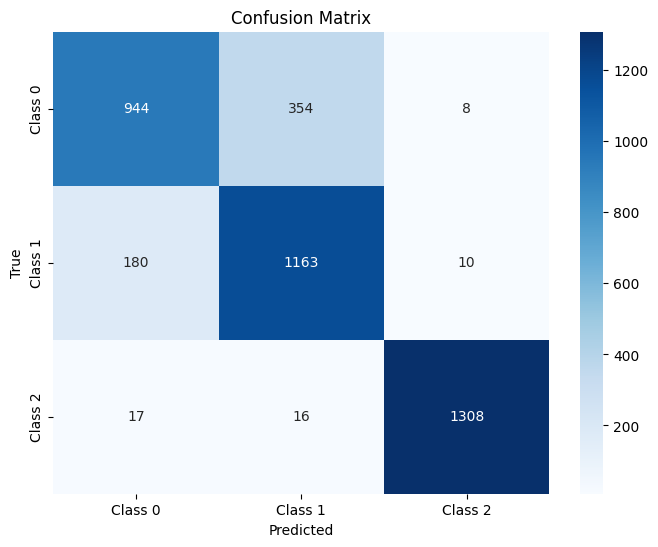

{'eval_loss': 0.3762088119983673, 'eval_accuracy': 0.85375, 'eval_precision': 0.8574381097057312, 'eval_recall': 0.85375, 'eval_f1': 0.8533684127747686, 'eval_runtime': 14.0671, 'eval_samples_per_second': 284.352, 'eval_steps_per_second': 35.544, 'epoch': 1.0}
{'loss': 0.2715, 'grad_norm': 6.372013568878174, 'learning_rate': 1.1670000000000002e-05, 'epoch': 1.25}
{'loss': 0.2546, 'grad_norm': 20.622289657592773, 'learning_rate': 1.0003333333333333e-05, 'epoch': 1.5}
{'loss': 0.2928, 'grad_norm': 12.513397216796875, 'learning_rate': 8.336666666666668e-06, 'epoch': 1.75}
{'loss': 0.2624, 'grad_norm': 14.278966903686523, 'learning_rate': 6.6700000000000005e-06, 'epoch': 2.0}


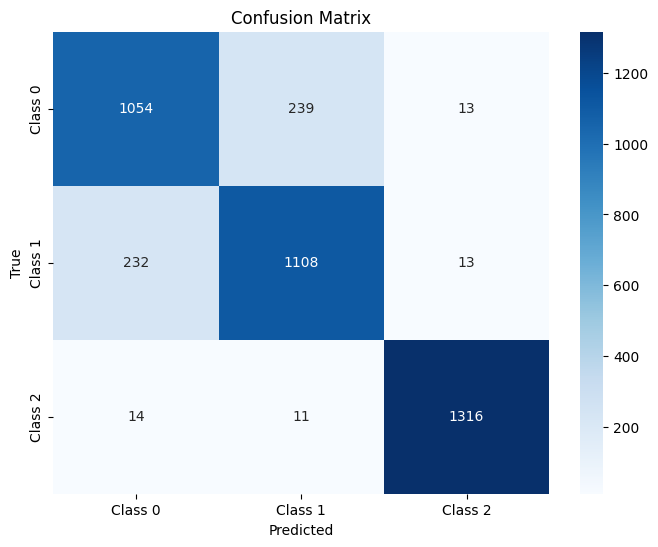

{'eval_loss': 0.4383227825164795, 'eval_accuracy': 0.8695, 'eval_precision': 0.8694511151836165, 'eval_recall': 0.8695, 'eval_f1': 0.8694731713775166, 'eval_runtime': 14.0424, 'eval_samples_per_second': 284.851, 'eval_steps_per_second': 35.606, 'epoch': 2.0}
{'loss': 0.1736, 'grad_norm': 32.609249114990234, 'learning_rate': 5.0033333333333334e-06, 'epoch': 2.25}
{'loss': 0.1702, 'grad_norm': 13.615097045898438, 'learning_rate': 3.3366666666666668e-06, 'epoch': 2.5}


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from sklearn.model_selection import StratifiedKFold, ParameterGrid
from datasets import Dataset
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

texts = sentiment_dataset['text']
labels = sentiment_dataset['target']

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

def tokenize(texts):
    return tokenizer(texts, padding="max_length", truncation=True, max_length=128)

def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    labels = p.label_ids
    accuracy = accuracy_score(labels, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted', zero_division=1)
    cm = confusion_matrix(labels, preds)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

# Hyperparameter grid
param_grid = list(ParameterGrid({
    'learning_rate': [2e-5, 3e-5],
    'per_device_train_batch_size': [8, 16]
}))

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

metrics_all = {
    'f1': {str(p): [] for p in param_grid},
    'precision': {str(p): [] for p in param_grid},
    'recall': {str(p): [] for p in param_grid},
    'accuracy': {str(p): [] for p in param_grid},
}

for fold, (train_idx, val_idx) in enumerate(skf.split(texts, labels)):
    print(f"\nFold {fold + 1}")
    train_texts = texts.iloc[train_idx].tolist()
    val_texts = texts.iloc[val_idx].tolist()
    train_labels = labels.iloc[train_idx].tolist()
    val_labels = labels.iloc[val_idx].tolist()

    train_enc = tokenize(train_texts)
    val_enc = tokenize(val_texts)

    train_ds = Dataset.from_dict({'input_ids': train_enc['input_ids'], 'attention_mask': train_enc['attention_mask'], 'labels': train_labels})
    val_ds = Dataset.from_dict({'input_ids': val_enc['input_ids'], 'attention_mask': val_enc['attention_mask'], 'labels': val_labels})

    for params in param_grid:
        model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=3)

        model_dir = f"./models/fold{fold+1}_lr{params['learning_rate']}_bs{params['per_device_train_batch_size']}"
        os.makedirs(model_dir, exist_ok=True)

        args = TrainingArguments(
            output_dir=model_dir,
            eval_strategy="epoch",
            num_train_epochs=3,
            per_device_train_batch_size=params['per_device_train_batch_size'],
            per_device_eval_batch_size=params['per_device_train_batch_size'],
            learning_rate=params['learning_rate'],
            logging_dir="./logs",
            report_to="none",
            save_strategy="no",  # not saving during training
            disable_tqdm=True
        )

        trainer = Trainer(
            model=model,
            args=args,
            train_dataset=train_ds,
            eval_dataset=val_ds,
            compute_metrics=compute_metrics
        )

        trainer.train()
        result = trainer.evaluate()
        p_str = str(params)

        # Save model after training
        model.save_pretrained(model_dir)
        tokenizer.save_pretrained(model_dir)

        metrics_all['f1'][p_str].append(result['eval_f1'])
        metrics_all['precision'][p_str].append(result['eval_precision'])
        metrics_all['recall'][p_str].append(result['eval_recall'])
        metrics_all['accuracy'][p_str].append(result['eval_accuracy'])

        print(f"  Params: {params}, F1: {result['eval_f1']:.4f}, Precision: {result['eval_precision']:.4f}, Recall: {result['eval_recall']:.4f}, Acc: {result['eval_accuracy']:.4f}")




In [ ]:
# 📊 Testy statystyczne
for metric in metrics_all:
    print(f"{metric.upper()} - Friedman Test")
    df = pd.DataFrame(metrics_all[metric])
    print(f"\nŚrednie wyniki {metric}:")
    print(df.mean().sort_values(ascending=False).round(4))

    friedman = sp.posthoc_nemenyi_friedman(df.to_numpy())
    print(f"\n📈 Test Friedmana (p-wartości) dla metryki {metric.upper()}:")
    print(pd.DataFrame(friedman, index=df.columns, columns=df.columns))